## Evaluation Project - 1
# Baseball Case Study

Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# reading csv file and showing head of the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


About the columns
* W: Win
* R: Runs
* AB: At Bats
* H: Hits
* 2B: Doubles
* 3B: Triples
* HR: Homeruns
* BB: Walks
* SO: Strikeout 
* SB: Stolen Bases
* RA: Runs Allowed
* ER: Earned Runs
* ERA: Earned Run Average (ERA)
* CG: Complete Game
* SHO: Shutouts
* SV: Saves
* E: Errors

In [3]:
# checking shape of dataset
df.shape

(30, 17)

We have 30 rows and 17 columns

In [4]:
# checking null values in dataset
df.isnull().sum().sum()

0

There is no null value in dataset

In [5]:
# checking missing vaules in dataset
cols = df.columns
for i in cols:
    print(df.loc[df[i]==" "].sum().sum())

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


There is no missing value in the dataset

In [6]:
# checking duplicate values
df.duplicated().sum()

0

There is no duplicate value in dataset

In [7]:
# checking information about dataset like datatype, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Here, only ERA(Earned Run Average) contains data of float type and all other cloumns contains integer type data

In [8]:
# checking stats of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


I can see mean of CG(complete game) column is 3.46 and standard deviation is 2.76 that is data may be more deviated or i can say there may exist much varinace in CG columns and in all other columns deviation looks noraml as deviation is very less as compared to mean in all other columns.

In columns E(Errors) i see that data till 3rd quantile looks normal as the difference between each quantile looks significantly equal but is i see maximum value than it is much higher to there might be outliers and sanme with ER columns . 
Quantile range of every other columns looks good as there is nearly equal difference between each quantile and i will check in visualisation part that there are outliers or not

<AxesSubplot:>

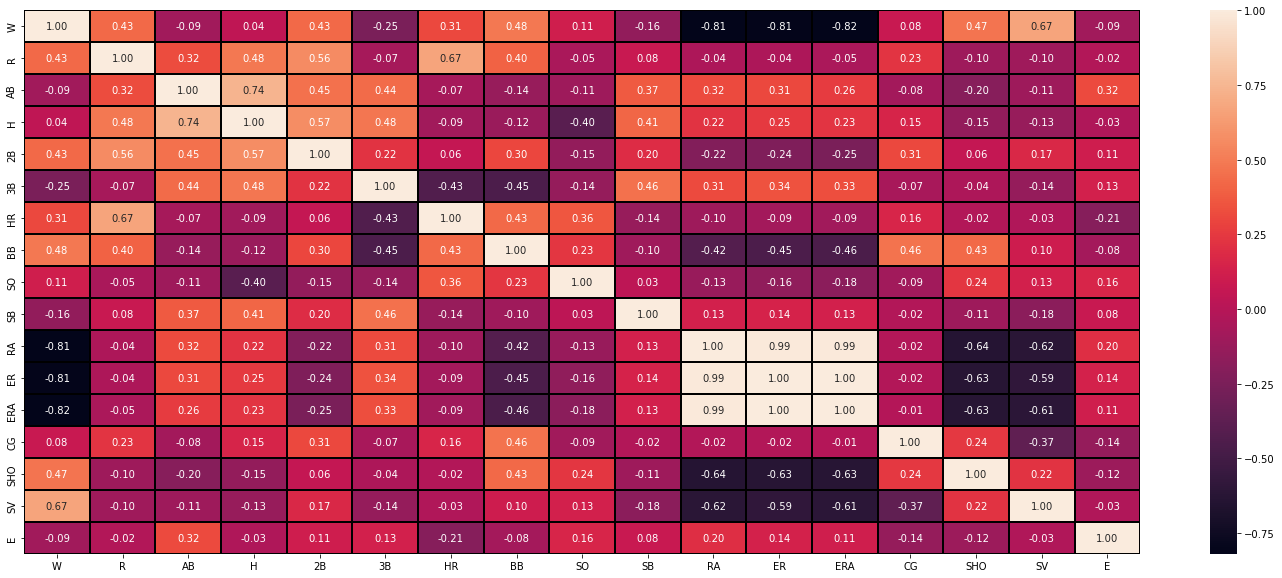

In [9]:
# checking correlation in columns using heatmap
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='black',linewidths=0.1)

* i see here RA, ER, and ERA are highly correlated(negative) with target column('W' i.e wins)
* ER, ERA , and RA are strongly correlated with each other so,  multicollinearity exist here. i will work on it in upcoming steps
* H and AB are also looks correlated and H is very less correlated(0.04) with target column W so we can drop H
* AB, CG, E are also very less correlated with W(target column) so i can drop these columns too
* SV, SHO also looks not that much highly correlated with RA, ER, ERA but they are correlated to that extent which i guess i should not neglect
* HR also looks correlated with R 
                           - i will confirm these correlations in visualising part

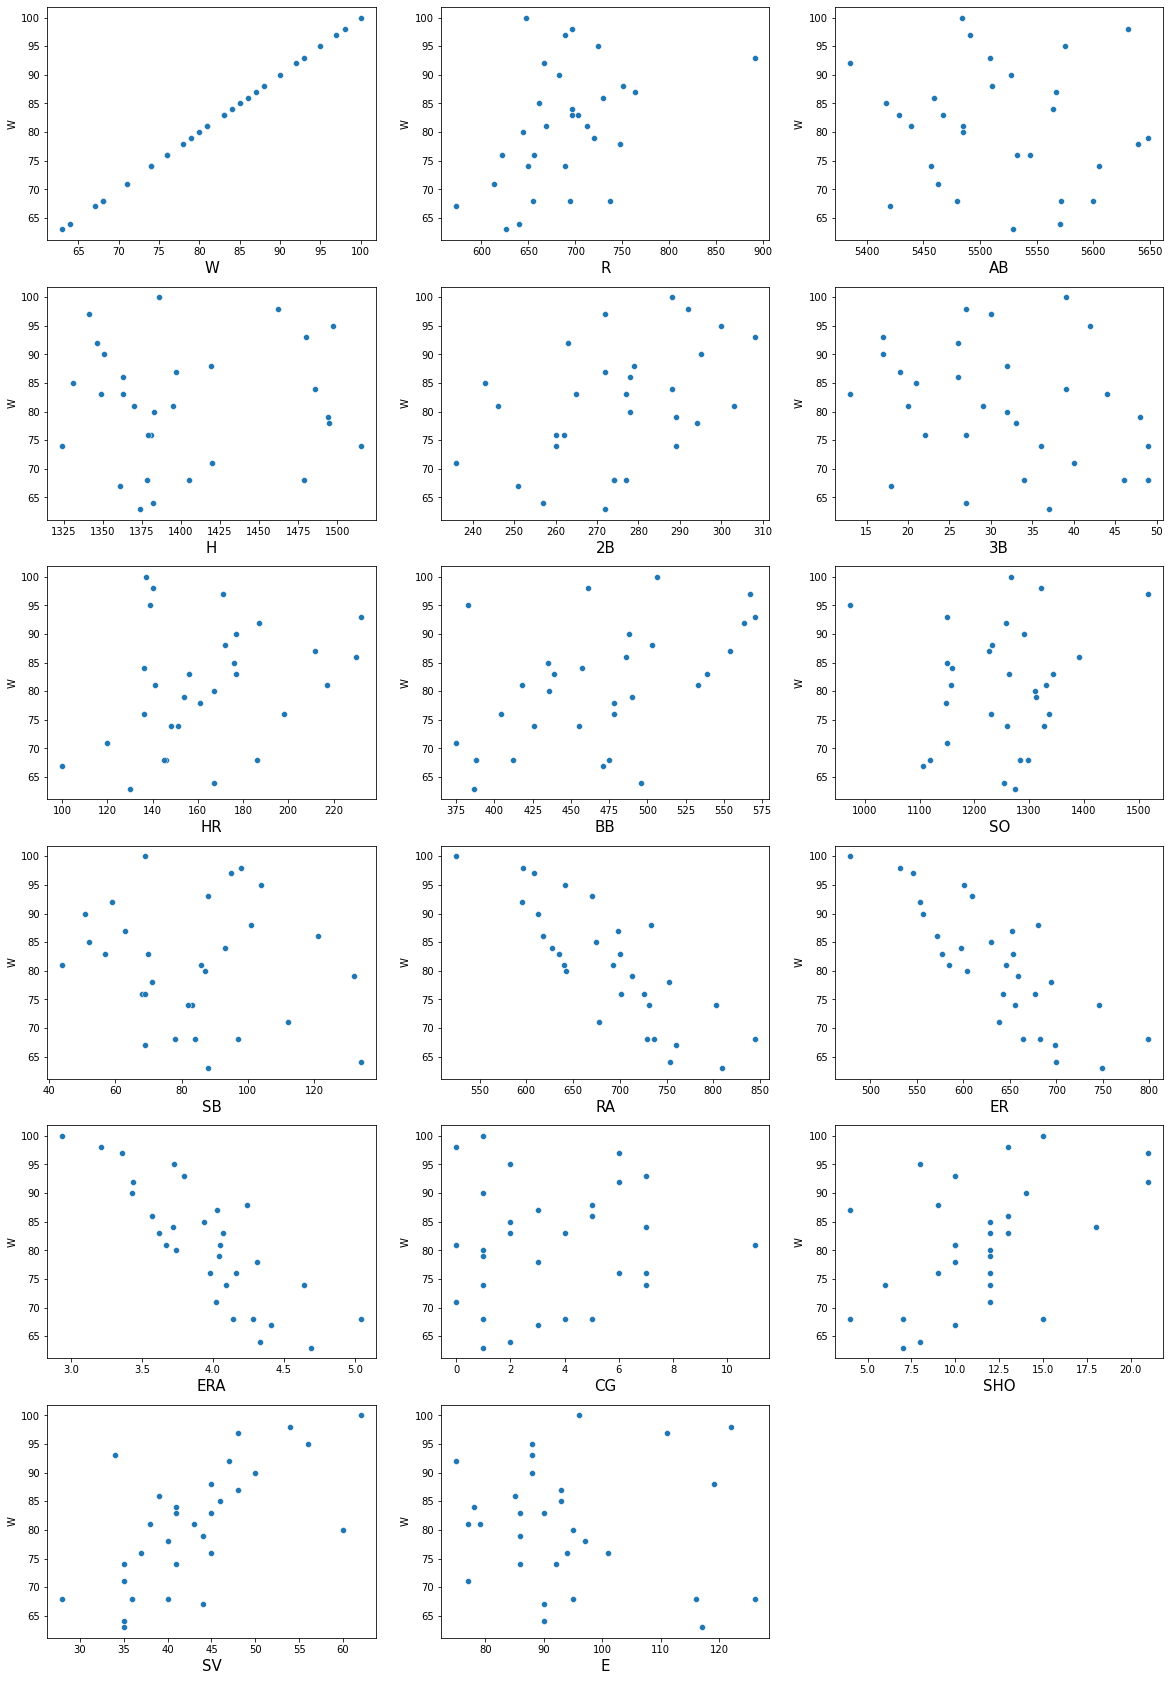

In [10]:
# checking relation with target column
plt.figure(figsize=(20,30))
plotnumber = 1
for column in df:
    if plotnumber<=17:
        plt.subplot(6,3,plotnumber)
        sns.scatterplot(x=df[column],y=df.W)
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()

* I find that SV, R follows a trend(+ve)
* SHO also looks like it follows some trand(+ve)
* 2B, and BB i guess following little trend
* RA, ER and ERA following a  trend (-ve) 
* i can see a little trend in HR vs W also

Now i wil remove those columns which are very less correlated with target column and after that i will check multicollinearity 

In [11]:
# droping those columns which are very less correlated with W(target column) on the basis of above analysis
df = df.drop(columns=['E','CG','SB','SO','H','AB'])

In [12]:
# checking head of new dataframe after removing columns and checking shape
print('Shape of new dataset :', df.shape)
df.head()

Shape of new dataset : (30, 11)


,W,R,2B,3B,HR,BB,RA,ER,ERA,SHO,SV
0,95,724,300,42,139,383,641,601,3.73,8,56
1,83,696,277,44,156,439,700,653,4.07,12,45
2,81,669,303,29,141,533,640,584,3.67,10,38
3,76,622,260,27,136,404,701,643,3.98,9,37
4,74,689,289,49,151,455,803,746,4.64,12,35


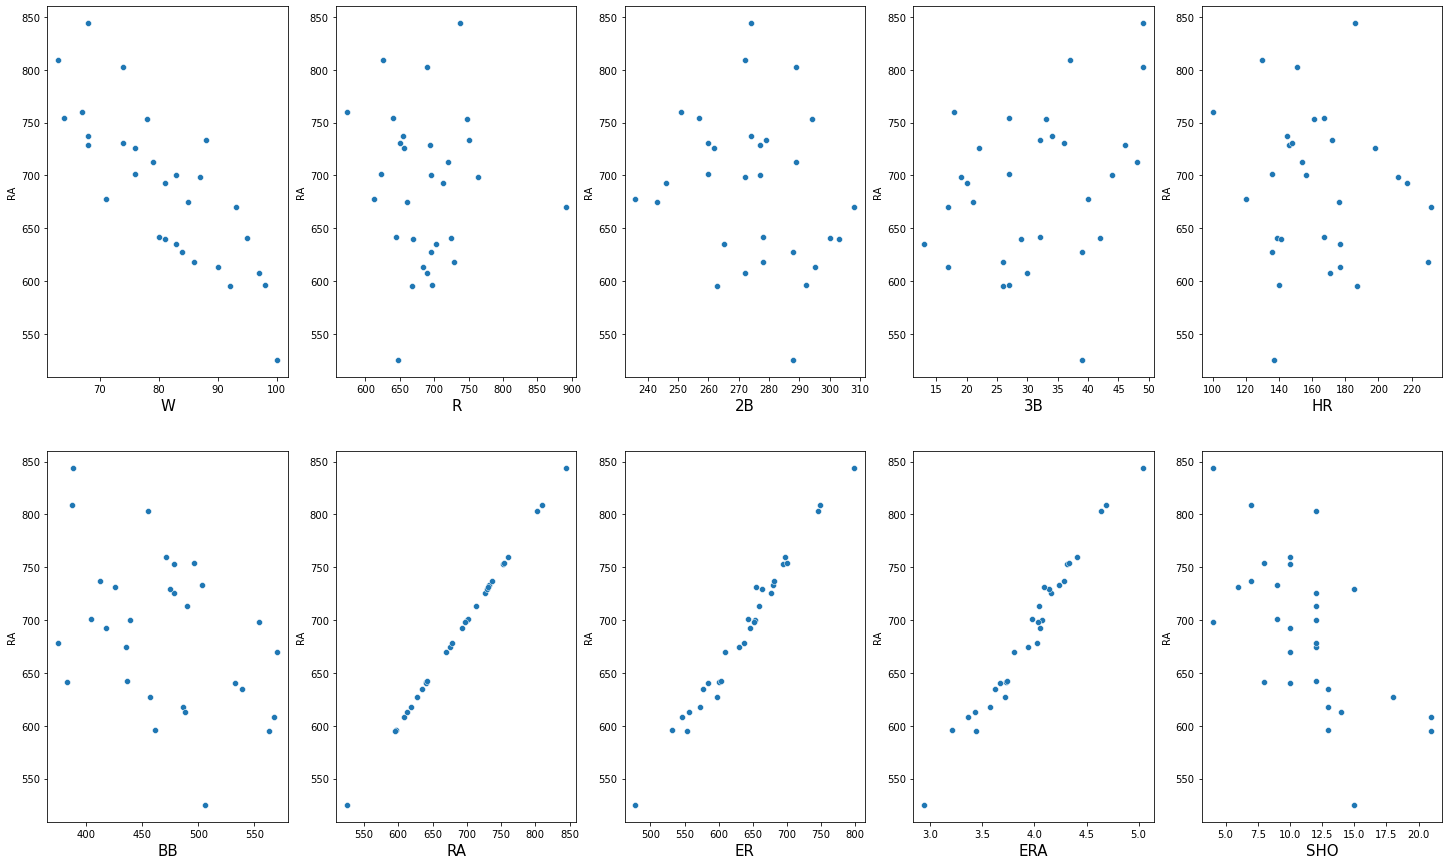

In [13]:
# checking relation with target column
plt.figure(figsize=(25,15))
plotnumber = 1
for column in df:
    if plotnumber<=10:
        plt.subplot(2,5,plotnumber)
        sns.scatterplot(x=df[column],y=df.RA)
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()

As i can see RA is correlated with ER and ERA but also with W so to remove this multicollinearity i will remove RA and ER as they are less correlated to W(target column) as compared to ERA . and which i can see also in heatmap that these 3 columns(ER,RA,ERA) are correlated to each other and also with target column so i will pick ERA out of them aa it is more correlated with target column 

In [14]:
# droping ER and RA
df.drop(columns=['ER','RA'],inplace=True)

In [15]:
# checking head of new dataframe after removing columns and checking shape
print('Shape of new dataset :', df.shape)
df.head()

Shape of new dataset : (30, 9)


,W,R,2B,3B,HR,BB,ERA,SHO,SV
0,95,724,300,42,139,383,3.73,8,56
1,83,696,277,44,156,439,4.07,12,45
2,81,669,303,29,141,533,3.67,10,38
3,76,622,260,27,136,404,3.98,9,37
4,74,689,289,49,151,455,4.64,12,35


<AxesSubplot:>

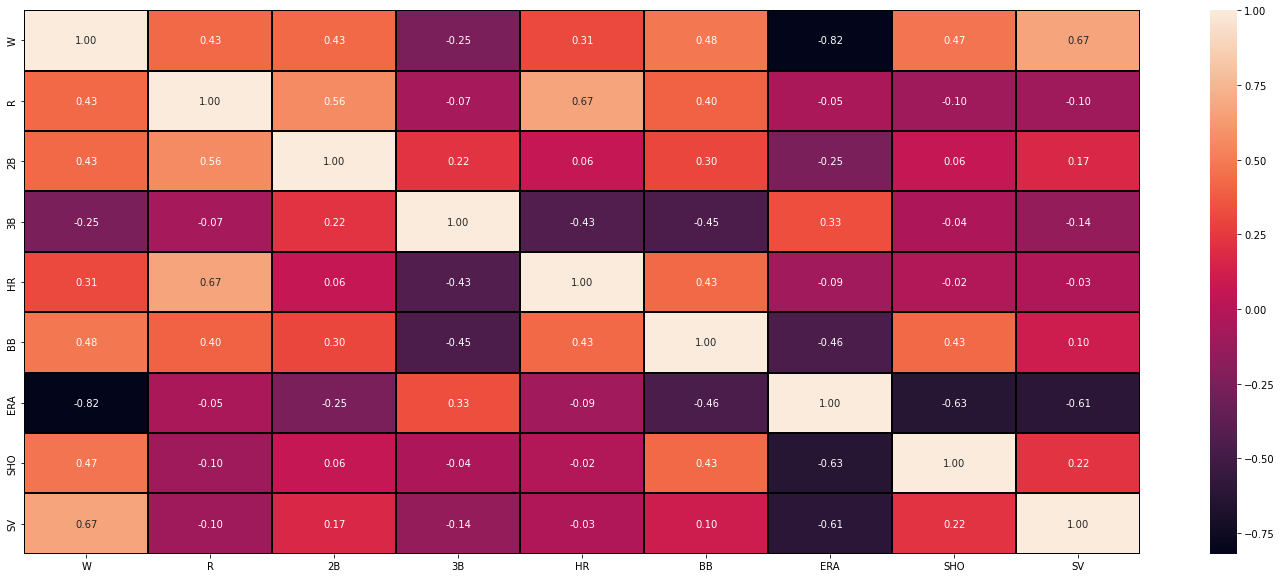

In [16]:
# checking correlation in columns using heatmap again
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='black',linewidths=0.1)

Now, it looks like HR and R, SHO and ERA have some correlation let's check visually 

<AxesSubplot:xlabel='SHO', ylabel='ERA'>

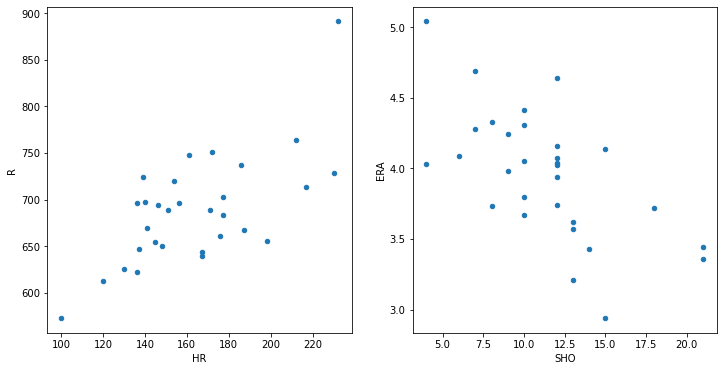

In [17]:
# checking correlation between HR and R, SHO and ERA
fig, axs = plt.subplots(1,2)
df.plot(kind='scatter', x='HR',y='R',ax=axs[0],figsize=(12,6))
df.plot(kind='scatter', x='SHO',y='ERA',ax=axs[1])

I see trend in both the figure so i will drop one of them from each figure on the basis which is more correlated with target column

By analyising above heatmap i will remove HR as it is less correlated to to target as compared to R and. and i will drop SHO for the same reason 

In [18]:
# droping SHO and HR
df = df.drop(columns=['HR','SHO'],axis = 1)

In [19]:
# checking head of final dataframe after removing HR and SHO and checking shape
print('Shape of new dataset :', df.shape)
df.head()

Shape of new dataset : (30, 7)


,W,R,2B,3B,BB,ERA,SV
0,95,724,300,42,383,3.73,56
1,83,696,277,44,439,4.07,45
2,81,669,303,29,533,3.67,38
3,76,622,260,27,404,3.98,37
4,74,689,289,49,455,4.64,35


Now i can move to skewness and outliers checking part

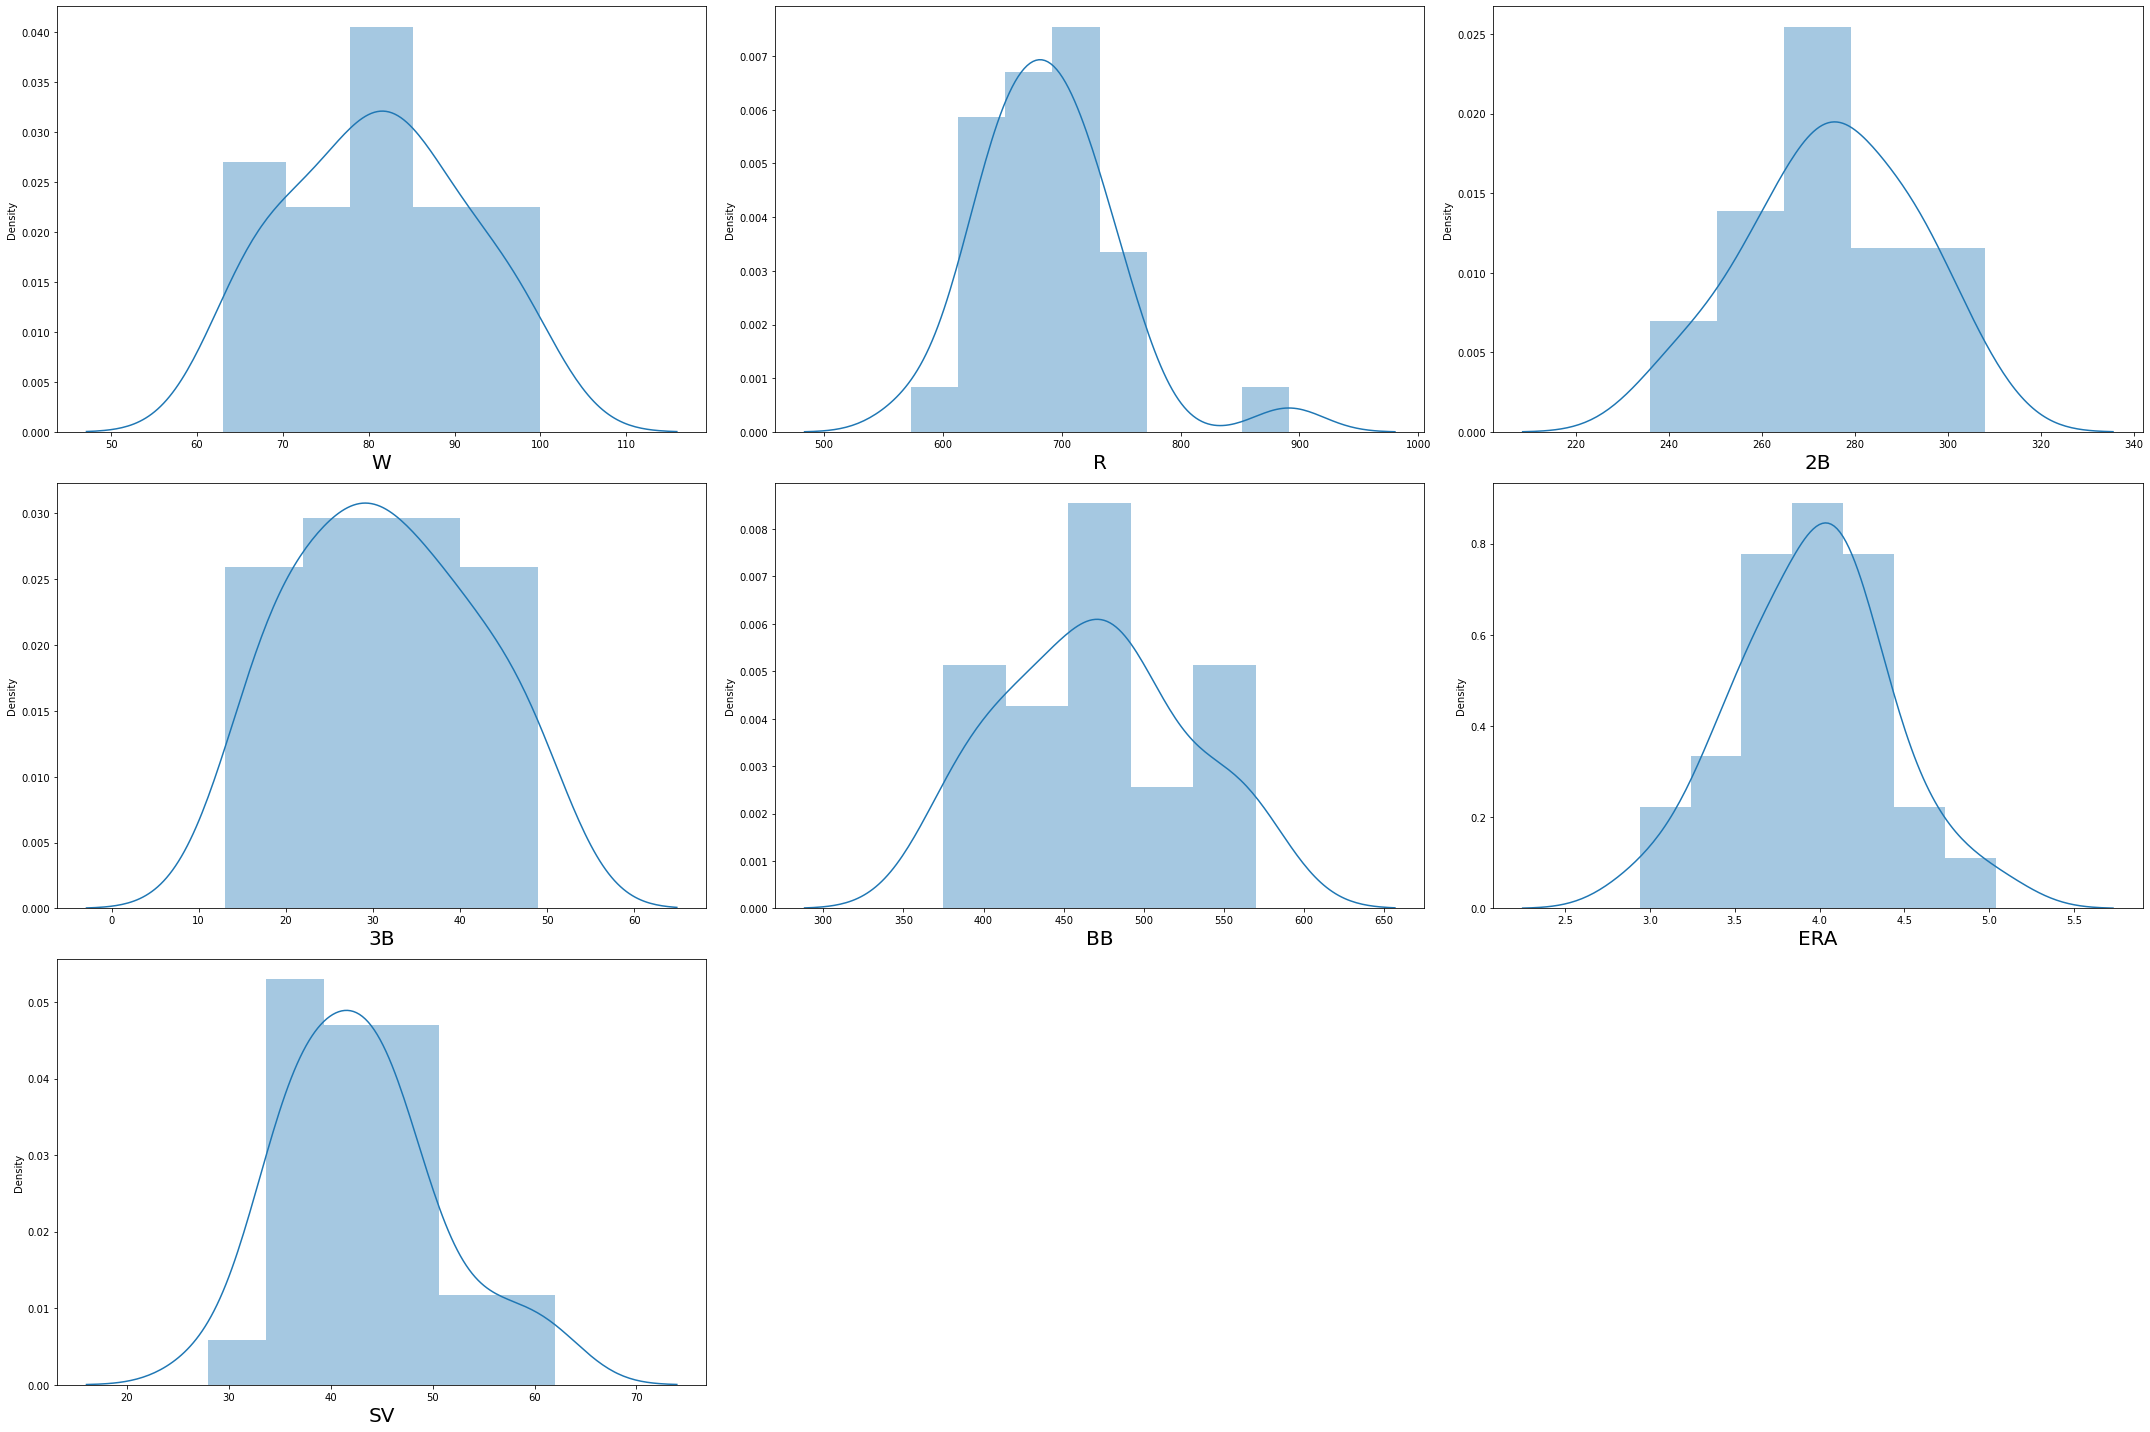

In [20]:
# checking kewness by visualing data distribution
plt.figure(figsize = (30,20))
plotnumber = 1

for column in df:
    if plotnumber<=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

Data distribution looks normal in all the columns(as i can see bell curved shape) except in R i guess there are some outliers in it lets check it

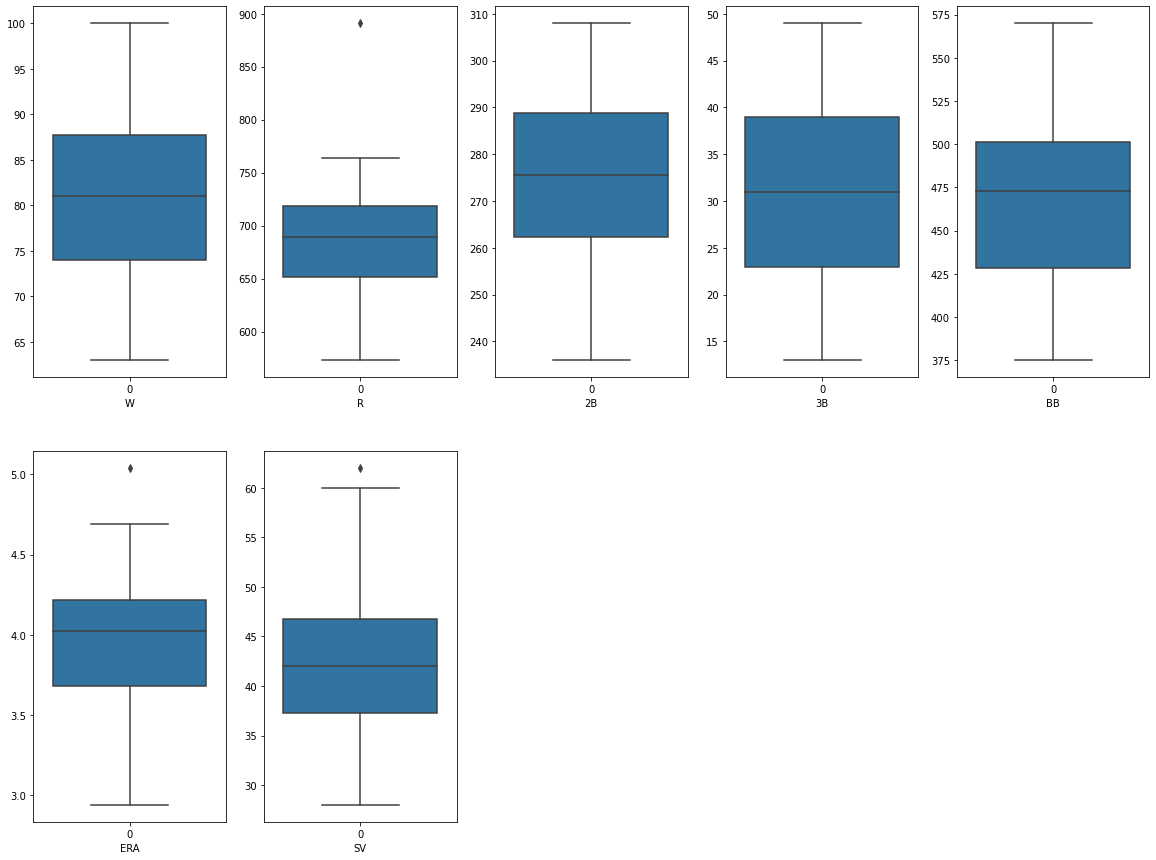

In [21]:
# checking outliers in dataset
plt.figure(figsize=(20,15))
point = 1
for column in df:
    if point<=7:
        plt.subplot(2,5,point)
        ax = sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize=10)
    point+=1
plt.show()

I see one outlier in ERA, one in SV and one in R lets remove them

In [22]:
# removing outliers from R
min_e, max_e = df['R'].quantile([0.00, 0.98])
min_e, max_e

(573.0, 817.3399999999998)

<AxesSubplot:xlabel='R'>

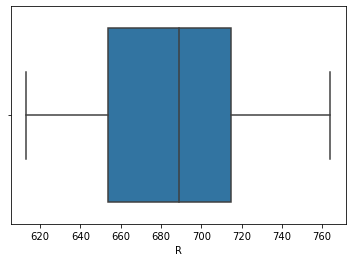

In [23]:
df = df[(df['R']<max_e)&(df['R']>min_e)]
# checking outliers
sns.boxplot(x=df['R'])

<AxesSubplot:xlabel='ERA'>

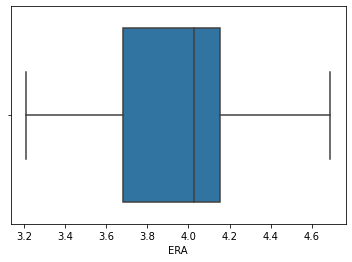

In [24]:
# removing outliers from ERA
min_r, max_r = df['ERA'].quantile([0.00, 0.98])
min_r, max_r

df = df[(df['ERA']<max_r)&(df['ERA']>min_r)]
# checking outliers
sns.boxplot(x=df['ERA'])

<AxesSubplot:xlabel='SV'>

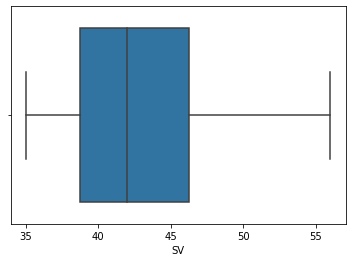

In [25]:
# removing outliers from SV
min_s, max_s = df['SV'].quantile([0.00, 0.98])
min_s, max_s

df = df[(df['SV']<max_s)&(df['SV']>min_s)]
# checking outliers
sns.boxplot(x=df['SV'])

Outliers are removed there is no skewness and multicollinearity is also removed no i can move to model building part

before that let's Scale the data

In [26]:
# spliting data into features and label
x = df.drop(columns=['W'])
y = df.W

In [27]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### Let's build the models

In [48]:
# spliting data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=16)

### Linear regression 

In [49]:
# training the model with train data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
# searching best random state to get best train and test accuracy
from sklearn.metrics import r2_score
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    print(f"at random state {i},the training accuracy is : ,{lr.score(x_train,y_train)}")
    print(f"at random state {i},the testing accuracy is : ,{lr.score(x_test,y_test)}")
    print("\n")

at random state 0,the training accuracy is : ,0.950897047681686
at random state 0,the testing accuracy is : ,0.6275566587601071


at random state 1,the training accuracy is : ,0.9248391320901288
at random state 1,the testing accuracy is : ,0.7791743319600916


at random state 2,the training accuracy is : ,0.9410242619865866
at random state 2,the testing accuracy is : ,0.6796054536082132


at random state 3,the training accuracy is : ,0.9420906156554105
at random state 3,the testing accuracy is : ,0.8089561517926824


at random state 4,the training accuracy is : ,0.938450261041125
at random state 4,the testing accuracy is : ,0.6041402315809418


at random state 5,the training accuracy is : ,0.8899024379863222
at random state 5,the testing accuracy is : ,0.9707050763145865


at random state 6,the training accuracy is : ,0.924152810405483
at random state 6,the testing accuracy is : ,0.3267199935675964


at random state 7,the training accuracy is : ,0.9114484111844806
at random state 7,the

by checking manually i find the best random state 82 as at this random state the difference between train and test score is minimum so i wll go with 82 random state

In [69]:
# spliting data with random state 82
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=82)

In [71]:
# checking train sccore 
lr.fit(x_train,y_train)
print("traing score",lr.score(x_train,y_train)*100)
# checking test score
print("testing score",lr.score(x_test,y_test)*100)

traing score 90.97031638562912
testing score 90.6943809378463


now test and test score is equal and it is 90% which is good so i can say " lr " model learned well

In [75]:
# now checking model accuracy by comparing actual and predicted value
from sklearn import metrics
y_pred = lr.predict(x_test)
print("****accuracy****")
print(metrics.r2_score(y_test,y_pred)*100)

****accuracy****
90.6943809378463


model is giving 90% accuracy which is good

In [78]:
# checking RMSE 
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = lr.predict(x_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  2.7243644697385454


RMSE should be close to zero but here dataset is very small so RMSE(2.74) is fine

In [91]:
# Regularisation
# lasso
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lassocv = LassoCV(alphas=None , max_iter=100 , normalize = True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
alpha

0.10074849428686346

In [92]:
# now train with alpha
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.10074849428686346)

In [94]:
lasso_reg.score(x_test,y_test)*100

89.78381415182466

lasso is giving text score 89% nearly equal to 90% and without lasso model text score is 90% so i can say that model is not over fitting 

In [95]:
# ridge
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [96]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [97]:
ridge_model.score(x_test,y_test)

0.9070256913679203

it is also giving same texting score as above so my conclusion is correct

### AdaBoost 

In [98]:
# traing with adaBoost
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [99]:
# model prediction on train data and checking accuracy
y_pred = ada.predict(x_train)
accuracy = metrics.r2_score(y_train,y_pred)
print('R Square Score : ',accuracy)

R Square Score :  0.9952683982007872


model is predicting train data 99% accuractly let's  check with text data

In [102]:
# predicting the test data with the result
y_test_pred = ada.predict(x_test)
accuracy = metrics.r2_score(y_test,y_test_pred)
print('R Square Score :- ',accuracy)

R Square Score :-  0.7034400075225677


Now to accuracy is 70% only with the text data which is less may model is overfitting let's check

In [117]:
# cross validation if the model is overfitting
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(ada,x_scaled,y,cv=4).mean()

0.703213837596461

i check manually with different cv values and model is not over fitting as cross_val score is equal to accuracy of test data

In [118]:
# Hyperparameter tuning to increase accuracy using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':[20,35,47,50,60,70,80,100], 'learning_rate':[0.25,0.30,0.40]}

In [119]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions = params)
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [20, 35, 47, 50, 60, 70,
                                                         80, 100]})

In [120]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [20, 35, 47, 50, 60, 70,
                                                         80, 100]})

In [121]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=20)

these are the best parameter for this dataset in adaboost algorithm let's check

In [195]:
# train the data with tuned prameter
ada = AdaBoostRegressor(learning_rate=0.1,n_estimators=40)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
print("****accuracy post tuning****")
print(metrics.r2_score(y_test,y_pred))

****accuracy post tuning****
0.78094004234927


it is giving accuracy 78%, accuracy is incresed by 8 % with the help of parameter tuning (i tuned the parameters manually as i don't give much range in gridsearchcv for parameters ) 

### Knn

In [196]:
# training data with knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [197]:
# checking accuracy
y_pred = knn.predict(x_test)
print('accuracy = ',metrics.r2_score(y_test,y_pred))

accuracy =  0.6889669007021064


it is giving less accuracy as compared to above models let's check overfitting/under fitting

In [220]:
# cross validation of model
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(knn,x_scaled,y,cv=3).mean()

0.5680345729348107

as cross_val score is less than accuracy so the model is over fitting 

In [221]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_drid = {'algorithm': ['kd_tree','brute'],
             'leaf_size':[3,4,5,6,7,8],
             'n_neighbors':[3,4,7,9,11,13]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_drid)

In [222]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 4, 5, 6, 7, 8],
                         'n_neighbors': [3, 4, 7, 9, 11, 13]})

In [223]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 9}

In [233]:
knn = KNeighborsRegressor(algorithm = 'kd_tree', leaf_size = 2, n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("****accuracy post tuning****")
print(metrics.r2_score(y_test,y_pred))

****accuracy post tuning****
0.6889669007021064


it is giving accuracy 68%, accuracy is incresed by 0 % with the help of parameter tuning it is because model randomly picked the same parameters (i tuned the parameters manually as i don't give much range in gridsearchcv for parameters ) 

##  SVM

In [234]:
# training model with SVM
from sklearn.svm import SVR
svr = SVR()

# model training and score
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
print('accuracy : ',metrics.r2_score(y_test,y_pred))

accuracy :  0.11894952600248687


it is giving very less accuracy as comapred to all above models 

In [244]:
# crossvalidation
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(svr,x,y,cv=2).mean()

-0.043859015555308356

it is giving -ve value mean may be because data set is very small and model is underfitting

In [245]:
# hyperparameter tuning
param_grid = {'C':[1,5,10,20],
              'gamma':[0.001,0.01,0.2,0.002]
             }
gridsearch = GridSearchCV(svr, param_grid)

gridsearch.fit(x_train,y_train)

# best param
gridsearch.best_params_

{'C': 20, 'gamma': 0.01}

In [258]:
svr = SVR(C=70,gamma=0.1)

# model training and score
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

print('post tuning accuracy :',metrics.r2_score(y_test,y_pred)*100)

post tuning accuracy : 90.04947115957161


accuracy is 90 %  after parameter tuning i guess svr used worst parameters during training that is why it was giving very less accuracy

* from the abouve algorithms i select linear regression as it is giving best accuracy above all for this dataset

In [260]:
# saving the model
import pickle
filename = "baseball"
pickle.dump(lr,open(filename,'wb'))